In [ ]:
# IGNORE THIS CELL WHICH CUSTOMIZES LAYOUT AND STYLING OF THE NOTEBOOK !
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings = lambda *a, **kw: None

# Exercise 3.9 - Rotated pole grids
prepared by M.Hauser

This is a short exercise showing how we can plot data from a regional climate model using its native coordinates.

In [11]:
import xarray as xr

import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import numpy as np

%matplotlib inline

In [12]:
import mplotutils as mpu

## Loading data

We load one timestep of the latent heat flux from a regional climate simulation.

The data was extracted in another [notebook](./../data/prepare_weather_at_home.ipynb).

In [13]:
ds = xr.open_dataset("../data/wah_LH.nc")
ds

<xarray.Dataset>
Dimensions:     (lat: 119, lon: 122)
Coordinates:
  * lat         (lat) float32 25.19 24.750002 24.310001 ... -26.289999 -26.73
  * lon         (lon) float32 -31.730011 -31.290009 ... 21.069977 21.50998
    global_lat  (lat, lon) float32 ...
    global_lon  (lat, lon) float32 ...
Data variables:
    LH          (lat, lon) float32 ...
Attributes:
    pole_lon:  -162.0
    pole_lat:  39.25

## Different coordinates

Regional climate model simulations are often conducted with rotated pole. The North Pole is shifted such that the region of interest is centered over the Equator (0 °N, 0 °W). Like this the grid cells are as square as possible on a sphere.

Therefore, there are two latitude coordinates.
 * `lat` for the rotated pole, here from -26 °N to 25 °N
 * `global_lat` for the normal pole, here from 17 °N to 75 °N

The same applies to the longitude.

### Exercise
 * plot  `LH`, using `lat` and `lon`

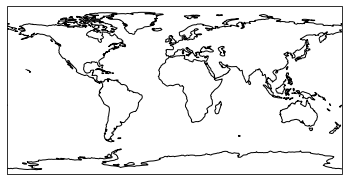

In [14]:
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

ax.set_global()

# ax.pcolormesh(...)

ax.set_global()

### Solution

I assume you know that this goes wrong.

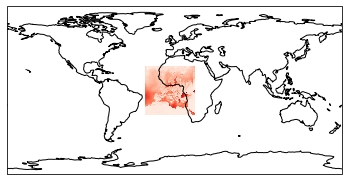

In [15]:
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

ax.pcolormesh(ds.lon, ds.lat, ds.LH, transform=ccrs.PlateCarree(), cmap="Reds")

ax.set_global()

This does not work, because the regional climate simulation is on a rotated pole. Thus lat goes from -26 to 25 and lon from -31 to 21.

We of course need to use `global_lon` and `global_lat`, which contain the 'real' coordinates.

### Exercise

 * replace `lon` and `lat` with `global_lon` and `global_lat`

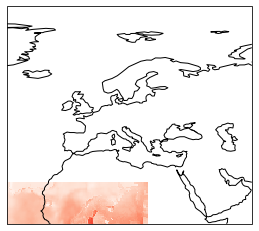

In [16]:
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

ax.pcolormesh(ds.lon, ds.lat, ds.LH, transform=ccrs.PlateCarree(), cmap="Reds")

ax.set_extent([-30, 60, 10, 90], ccrs.PlateCarree())

### Solution

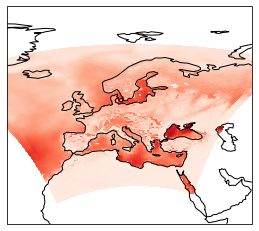

In [17]:
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

ax.pcolormesh(
    ds.global_lon, ds.global_lat, ds.LH, transform=ccrs.PlateCarree(), cmap="Reds"
)

ax.set_extent([-30, 60, 10, 90], ccrs.PlateCarree())

## `ccrs.RotatedPole`

So far so good, but now comes the cool thing. We can tell cartopy that our data is on a rotated pole, and we can then directly use `lon` and `lat` for plotting.

### Exercise

 * go back to the first plot (using `lat` and `lon`), but exchange `transform` so that the plot is correct
 * bonus: use `infer_interval_breaks` from `mpu`

In [18]:
# uncomment to get the docstring
# ccrs.RotatedPole?

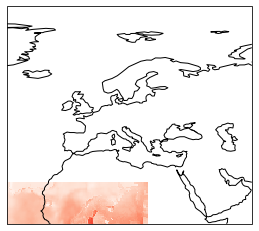

In [19]:
# this is the EURO CORDEX POLE
pole_lon = ds.attrs["pole_lon"]  # -162.0
pole_lat = ds.attrs["pole_lat"]  # 39.25
# exchange this
transform = ccrs.PlateCarree()


ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

# maybe calculate LON and LAT
# LON, LAT = ...

ax.pcolormesh(ds.lon, ds.lat, ds.LH, cmap="Reds", transform=transform)

ax.set_extent([-30, 60, 10, 90], ccrs.PlateCarree())

### Solution

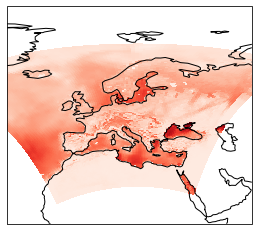

In [20]:
# this is the EURO CORDEX POLE
pole_lon = ds.attrs["pole_lon"]  # -162.0
pole_lat = ds.attrs["pole_lat"]  # 39.25
transform = ccrs.RotatedPole(pole_longitude=pole_lon, pole_latitude=pole_lat)

ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

LON, LAT = mpu.infer_interval_breaks(ds.lon, ds.lat)
ax.pcolormesh(LON, LAT, ds.LH, transform=transform, cmap="Reds")

ax.set_extent([-30, 60, 10, 90], ccrs.PlateCarree())